In [40]:
#import necessary tools
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#import dataset
btc = pd.read_csv("H:\steven_smith.csv")

In [42]:
#verify dataset import success
btc.head(30)


,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI,Google trends
0,02/05/2019,5402.42,54003657.44,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,NaN,160.85,73.68,271.97,0.069020,8036.770020,26307.78906,NaN
1,01/05/2019,5350.91,44213520.72,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,NaN,162.19,74.30,267.99,0.070338,8049.640137,26430.14063,NaN
2,30/04/2019,5247.73,51477170.55,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,NaN,155.17,67.95,237.57,0.064661,8095.390137,26592.91016,NaN
3,29/04/2019,5284.86,51477170.55,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,NaN,157.29,69.78,255.55,0.068620,8161.850098,26554.39063,NaN
4,28/04/2019,5271.75,43266088.13,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,NaN,158.50,72.12,264.12,0.070189,NaN,NaN,NaN
5,27/04/2019,5279.47,47687440.20,1.255491,547738.0,381209,6.353030e+12,91.447449,1.227443e+09,NaN,156.27,73.21,264.09,0.069211,NaN,NaN,NaN
6,26/04/2019,5210.30,45160953.30,1.219516,529636.0,384089,6.353030e+12,94.300876,8.217963e+08,1284.20,154.58,71.36,267.19,0.069347,8146.399902,26543.33008,NaN
7,25/04/2019,5466.52,51477170.55,1.234416,595208.0,404279,6.353030e+12,130.674926,1.527179e+09,1280.80,165.91,73.25,279.21,0.072643,8118.680176,26462.08008,NaN
8,24/04/2019,5571.51,36634060.02,1.255767,500657.0,311753,6.353030e+12,96.481210,8.216152e+08,1271.65,171.35,74.75,290.96,0.074524,8102.009766,26597.05078,NaN
9,23/04/2019,5399.37,42318655.54,1.142223,458919.0,342014,6.353030e+12,70.126933,7.303091e+08,1269.50,172.01,76.85,292.79,0.078067,8120.819824,26656.39063,NaN


In [43]:
btc.shape

(3735, 17)

In [44]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 17 columns):
date                             3735 non-null object
BTC Price                        3735 non-null float64
BTC network hashrate             3734 non-null float64
Average BTC block size           3735 non-null float64
NUAU - BTC                       3727 non-null float64
Number TX - BTC                  3735 non-null int64
Difficulty - BTC                 3735 non-null float64
TX fees - BTC                    3735 non-null float64
Estimated TX Volume USD - BTC    3735 non-null float64
Gold in USD                      2662 non-null float64
Ethereum Price                   1336 non-null float64
Litecoin Price                   2728 non-null float64
Bitcoin Cash Price               626 non-null float64
Cardano Price                    556 non-null float64
Nasdaq composite index           2574 non-null float64
DJI                              2574 non-null float64
Google trends     

In [45]:
#Analyse google trends data before removing
trends = btc[:-1576]#btc price info, focus of our study, does not start until 28/04/2013. Therefore remove all rows below
trends = trends[['date','BTC Price','Google trends']]
trends.set_index('date', inplace=True)
trends = trends.dropna()
trends.head(71)


,BTC Price,Google trends
date,,
01/04/2019,4105.36,12
01/03/2019,3853.76,9
01/02/2019,3460.55,10
01/01/2019,3746.71,10
01/12/2018,4024.46,13
01/11/2018,6318.14,13
01/10/2018,6619.85,10
01/09/2018,7044.81,12
01/08/2018,7769.04,13


Text(0.5,0,'Google Trend Interest Ranking')

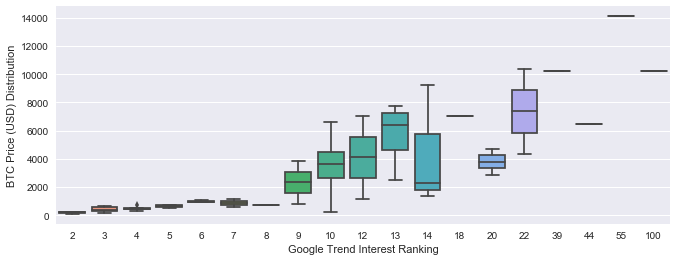

In [46]:
#Visualise google trends data
gtrend=sns.boxplot(data=trends, x='Google trends', y='BTC Price', order=['2','3','4','5','6','7','8','9','10','12','13','14','18','20','22','39','44','55','100'])
gtrend.set_ylabel('BTC Price (USD) Distribution')
gtrend.set_xlabel('Google Trend Interest Ranking')

In [47]:
#deal with missing values
btc = btc[:-1576]#btc price info, focus of our study, does not start until 28/04/2013. Therefore remove all rows below
btc = btc.iloc[24:]#remove top 24 rows due to missing dates and NUAU
btc = btc.drop(columns="Google trends")#remove variable 'Google trends' 


In [48]:
#verify above
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 24 to 2158
Data columns (total 16 columns):
date                             2135 non-null object
BTC Price                        2135 non-null float64
BTC network hashrate             2135 non-null float64
Average BTC block size           2135 non-null float64
NUAU - BTC                       2135 non-null float64
Number TX - BTC                  2135 non-null int64
Difficulty - BTC                 2135 non-null float64
TX fees - BTC                    2135 non-null float64
Estimated TX Volume USD - BTC    2135 non-null float64
Gold in USD                      1523 non-null float64
Ethereum Price                   1312 non-null float64
Litecoin Price                   2135 non-null float64
Bitcoin Cash Price               602 non-null float64
Cardano Price                    532 non-null float64
Nasdaq composite index           1471 non-null float64
DJI                              1471 non-null float64
dtypes: float64(1

In [49]:
btc.head(30)

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
24,01/04/2019,4105.36,44078985.78,1.173566,373888.0,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.910156,26258.41992
25,31/03/2019,4105.46,44078985.78,1.204920,469689.0,377783,6.379270e+12,54.673729,352584524.1,NaN,142.14,60.64,168.64,0.071739,NaN,NaN
26,30/03/2019,4092.14,46615905.83,1.233981,517101.0,369817,6.379270e+12,63.482086,812699052.8,NaN,142.36,61.25,170.30,0.071257,NaN,NaN
27,29/03/2019,4068.30,46298790.82,1.217287,531559.0,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.319824,25928.67969
28,28/03/2019,4087.58,47250135.84,1.199630,527558.0,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.169922,25717.46094
29,27/03/2019,3984.24,42493410.75,1.207859,483706.0,366415,6.379270e+12,36.414956,594756742.5,1309.70,135.45,59.41,160.51,0.062232,7643.379883,25625.58984
30,26/03/2019,3969.23,46933020.83,1.056968,487474.0,322191,6.379270e+12,29.200962,597673169.6,1316.30,135.05,59.51,161.39,0.059206,7691.520020,25657.73047
31,25/03/2019,4024.11,47567250.84,0.753647,379661.0,226166,6.368920e+12,15.676303,290564609.5,1319.55,137.08,60.30,166.11,0.061850,7637.540039,25516.83008
32,24/03/2019,4035.16,43744504.06,0.840117,409451.0,251573,6.068890e+12,17.948863,313796060.0,NaN,138.32,61.24,167.09,0.063723,NaN,NaN
33,23/03/2019,4022.71,48571483.82,0.944549,503337.0,298524,6.068890e+12,27.147020,532934160.0,NaN,137.04,59.79,158.13,0.057993,NaN,NaN


In [50]:
#fix dtypes & verify
btc['date'] = pd.to_datetime(btc['date'], format='%d/%m/%Y')
btc['NUAU - BTC'] = btc['NUAU - BTC'].astype(np.int64)#number of unique addresses used should be whole number
btc['Nasdaq composite index'] = round(btc['Nasdaq composite index'],2)
btc['DJI'] = round(btc['DJI'],2)
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 24 to 2158
Data columns (total 16 columns):
date                             2135 non-null datetime64[ns]
BTC Price                        2135 non-null float64
BTC network hashrate             2135 non-null float64
Average BTC block size           2135 non-null float64
NUAU - BTC                       2135 non-null int64
Number TX - BTC                  2135 non-null int64
Difficulty - BTC                 2135 non-null float64
TX fees - BTC                    2135 non-null float64
Estimated TX Volume USD - BTC    2135 non-null float64
Gold in USD                      1523 non-null float64
Ethereum Price                   1312 non-null float64
Litecoin Price                   2135 non-null float64
Bitcoin Cash Price               602 non-null float64
Cardano Price                    532 non-null float64
Nasdaq composite index           1471 non-null float64
DJI                              1471 non-null float64
dtypes: dat

In [51]:
#set date as index
btc.set_index('date', inplace=True)

In [52]:
#verify the date indexing
btc.loc['2019-03-29']

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-03-29,4068.3,46298790.82,1.217287,531559,393698,6.379270e+12,47.81691,627329922.5,1295.4,139.34,61.17,169.35,0.065763,7729.32,25928.68


In [53]:
#deal with missing values where trading has not been available ie weekends
col = ['Gold in USD','Nasdaq composite index','DJI']
btc.loc[:,col] = btc.loc[:,col].bfill()

In [54]:
#Verify part 2
btc.head(30)

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-04-01,4105.36,44078985.78,1.173566,373888,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.91,26258.42
2019-03-31,4105.46,44078985.78,1.204920,469689,377783,6.379270e+12,54.673729,352584524.1,1295.40,142.14,60.64,168.64,0.071739,7729.32,25928.68
2019-03-30,4092.14,46615905.83,1.233981,517101,369817,6.379270e+12,63.482086,812699052.8,1295.40,142.36,61.25,170.30,0.071257,7729.32,25928.68
2019-03-29,4068.30,46298790.82,1.217287,531559,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.32,25928.68
2019-03-28,4087.58,47250135.84,1.199630,527558,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.17,25717.46
2019-03-27,3984.24,42493410.75,1.207859,483706,366415,6.379270e+12,36.414956,594756742.5,1309.70,135.45,59.41,160.51,0.062232,7643.38,25625.59
2019-03-26,3969.23,46933020.83,1.056968,487474,322191,6.379270e+12,29.200962,597673169.6,1316.30,135.05,59.51,161.39,0.059206,7691.52,25657.73
2019-03-25,4024.11,47567250.84,0.753647,379661,226166,6.368920e+12,15.676303,290564609.5,1319.55,137.08,60.30,166.11,0.061850,7637.54,25516.83
2019-03-24,4035.16,43744504.06,0.840117,409451,251573,6.068890e+12,17.948863,313796060.0,1311.30,138.32,61.24,167.09,0.063723,7642.67,25502.32


In [55]:
#verify bottom rows
btc.tail(10)

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2013-05-07,112.25,88.157562,0.159966,89457,59215,1.007629e+07,45.045019,48700263.0,1444.25,NaN,3.37,NaN,NaN,3396.63,15056.20
2013-05-06,115.98,81.645923,0.153041,64381,51244,1.007629e+07,50.999403,32747255.0,1469.25,NaN,3.59,NaN,NaN,3392.97,14968.89
2013-05-05,112.90,77.137866,0.150220,55974,49419,1.007629e+07,38.145919,22070654.0,1469.25,NaN,3.49,NaN,NaN,3378.63,14973.96
2013-05-04,98.10,77.137866,0.149233,56115,48349,1.007629e+07,42.747962,19138832.0,1469.25,NaN,3.03,NaN,NaN,3378.63,14973.96
2013-05-03,106.25,73.631600,0.175325,70210,55859,1.007629e+07,49.207822,34738967.0,1469.25,NaN,3.39,NaN,NaN,3378.63,14973.96
2013-05-02,116.38,72.128914,0.181150,67744,57278,1.007629e+07,55.084329,33019004.0,1469.25,NaN,3.78,NaN,NaN,3340.62,14831.58
2013-05-01,139.00,70.626228,0.159960,61672,50437,1.007629e+07,35.903448,32988744.0,1454.75,NaN,4.29,NaN,NaN,3299.13,14700.95
2013-04-30,144.00,74.633390,0.176944,60887,48795,1.007629e+07,54.593614,32294820.0,1469.00,NaN,4.40,NaN,NaN,3328.79,14839.80
2013-04-29,134.44,80.746756,0.133635,73687,50009,8.974296e+06,35.830093,41199388.0,1467.50,NaN,4.37,NaN,NaN,3307.02,14818.75


In [89]:
#check for missing dates
pd.date_range(start = '2013-04-28', end = '2019-04-01').difference(btc.index)

DatetimeIndex(['2015-11-23', '2015-11-24', '2015-11-25', '2015-12-28',
               '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-01',
               '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2018-06-14', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
               '2018-08-19', '2018-09-11'],
              dtype='datetime64[ns]', freq=None)

Text(0.5,0,'Year')

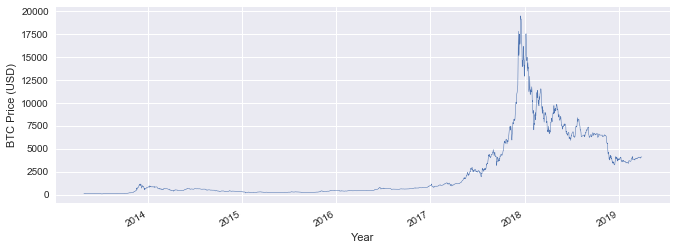

In [56]:
#BTC/USD Price Chart, source Yahoo Finance 
sns.set(rc={'figure.figsize':(11, 4)})#appropriate size for time series 
alltimebtcprice=btc['BTC Price'].plot(linewidth=0.5)
alltimebtcprice.set_ylabel('BTC Price (USD)')
alltimebtcprice.set_xlabel('Year')

In [78]:
#BTC/USD seasonality breakdown & switcheroo
data_2014 = btc['2014']
data_2014=data_2014.iloc[::-1]
data_2015 = btc['2015']
data_2015=data_2015.iloc[::-1]
data_2016 = btc['2016']
data_2016=data_2016.iloc[::-1]
data_2017 = btc['2017']
data_2017=data_2017.iloc[::-1]
data_2018 = btc['2018']
data_2018=data_2018.iloc[::-1]

Text(0,0.5,'BTC/USD')

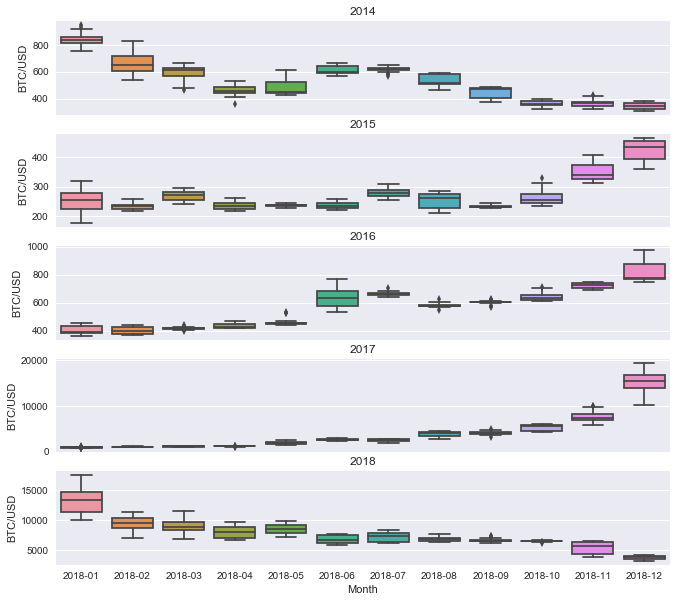

In [88]:
#BTC/USD yearly seasonality
data_2014['Month']=data_2014.index.to_period('M')
data_2015['Month']=data_2015.index.to_period('M')
data_2016['Month']=data_2016.index.to_period('M')
data_2017['Month']=data_2017.index.to_period('M')
data_2018['Month']=data_2018.index.to_period('M')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(11,10), sharex=True)
sns.boxplot(data=data_2014, x='Month', y='BTC Price', ax=ax1)
sns.boxplot(data=data_2015, x='Month', y='BTC Price', ax=ax2)
sns.boxplot(data=data_2016, x='Month', y='BTC Price', ax=ax3)
sns.boxplot(data=data_2017, x='Month', y='BTC Price', ax=ax4)
sns.boxplot(data=data_2018, x='Month', y='BTC Price', ax=ax5)
ax1.set_title("2014")
ax2.set_title("2015")
ax3.set_title("2016")
ax4.set_title("2017")
ax5.set_title("2018")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("BTC/USD")
ax2.set_ylabel("BTC/USD")
ax3.set_ylabel("BTC/USD")
ax4.set_ylabel("BTC/USD")
ax5.set_ylabel("BTC/USD")

Text(0,0.5,'BTC/USD')

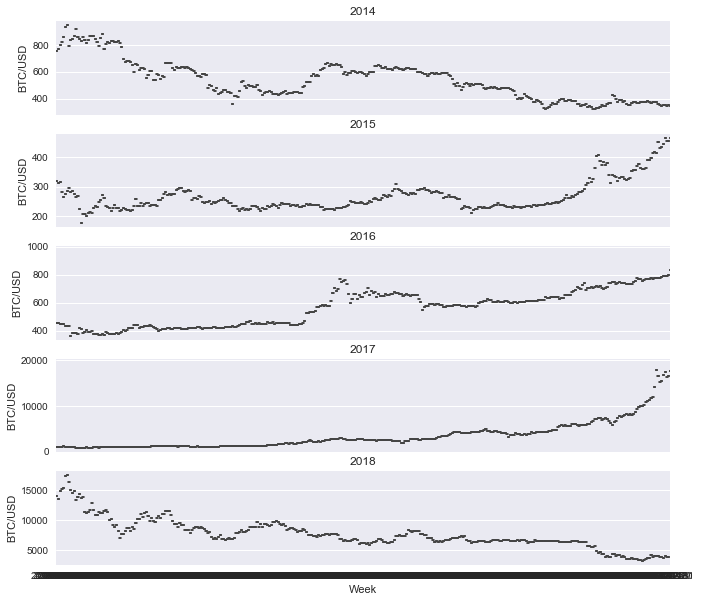

In [93]:
#BTC/USD weekly seasonality
data_2014['Week']=data_2014.index.to_period('D')
data_2015['Week']=data_2015.index.to_period('D')
data_2016['Week']=data_2016.index.to_period('D')
data_2017['Week']=data_2017.index.to_period('D')
data_2018['Week']=data_2018.index.to_period('D')
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(11,10), sharex=True)
sns.boxplot(data=data_2014, x='Week', y='BTC Price', ax=ax1)
sns.boxplot(data=data_2015, x='Week', y='BTC Price', ax=ax2)
sns.boxplot(data=data_2016, x='Week', y='BTC Price', ax=ax3)
sns.boxplot(data=data_2017, x='Week', y='BTC Price', ax=ax4)
sns.boxplot(data=data_2018, x='Week', y='BTC Price', ax=ax5)
ax1.set_title("2014")
ax2.set_title("2015")
ax3.set_title("2016")
ax4.set_title("2017")
ax5.set_title("2018")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax4.set_xlabel("")
ax1.set_ylabel("BTC/USD")
ax2.set_ylabel("BTC/USD")
ax3.set_ylabel("BTC/USD")
ax4.set_ylabel("BTC/USD")
ax5.set_ylabel("BTC/USD")

In [ ]:
#review descriptive stats
btc.describe()

In [20]:
#select sample period
sp = btc.loc['2019-04-01':'2018-04-01']
sp.head()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
date,,,,,,,,,,,,,,,
2019-04-01,4105.36,44078985.78,1.173566,373888,381652,6.379270e+12,44.604508,424739278.9,1293.50,141.47,60.77,168.90,0.069651,7828.91,26258.42
2019-03-31,4105.46,44078985.78,1.204920,469689,377783,6.379270e+12,54.673729,352584524.1,NaN,142.14,60.64,168.64,0.071739,NaN,NaN
2019-03-30,4092.14,46615905.83,1.233981,517101,369817,6.379270e+12,63.482086,812699052.8,NaN,142.36,61.25,170.30,0.071257,NaN,NaN
2019-03-29,4068.30,46298790.82,1.217287,531559,393698,6.379270e+12,47.816910,627329922.5,1295.40,139.34,61.17,169.35,0.065763,7729.32,25928.68
2019-03-28,4087.58,47250135.84,1.199630,527558,383186,6.379270e+12,48.020517,625699918.8,1295.15,141.01,62.22,173.10,0.067593,7669.17,25717.46
